# Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lightgbm as lgbm

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

# Data load

In [23]:
train=pd.read_csv('./train-Grid view.csv', index_col=0)
test=pd.read_csv('./test_x-Grid view.csv', index_col=0)
submission=pd.read_csv('./sample_submission-Grid view.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(21, 77)
(19, 76)
(19, 1)


In [24]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,363,4,1370,5,997,1,1024,2,1577,5,539,2,586,4,1095,5,1142,4,1287,4,883,4,851,2,851,5,816,2,579,2,924,2,366,2,876,2,633,1,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5,647,5,1313,3,3387,5,2969,1,4320,3,2190,1,826,1,4082,5,1867,3,1264,5,2943,4,3927,1,4329,5,1828,1,1214,5,2414,5,1356,1,3039,4,4304,1,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4,1623,1,1480,1,1021,4,3374,5,1333,1,531,4,1167,1,1016,3,2653,2,1569,5,998,5,2547,2,918,4,2153,2,1304,1,1131,5,937,4,1327,1,1170,1,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,504,3,2311,4,992,3,3245,1,357,2,1519,4,159,3,2275,5,2809,4,5614,3,3219,4,1296,4,9046,4,1216,4,1169,4,23868,3,581,4,8830,4,2392,5,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1,927,1,707,5,556,2,1062,1,1014,2,628,1,991,1,1259,5,1153,5,1388,5,740,5,1181,4,547,2,575,1,754,4,1140,5,323,5,1070,1,583,2,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,2,834,1,1769,4,2105,1,1070,5,1930,2,1258,5,1451,1,1029,3,1633,1,2254,5,1984,1,1158,3,1194,3,483,1,983,1,817,5,1052,1,1354,1,747,2,1826,40s,2,1,6,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1,1382,1,1473,5,1479,4,2403,1,616,2,549,5,390,4,1601,5,1312,1,1699,4,1229,4,1175,1,1078,4,341,5,635,2,1448,4,838,4,765,3,1954,1,1482,20s,2,1,3,Male,1,1,White,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,1,384,1,908,5,870,1,1059,1,1266,1,483,1,592,1,2020,5,6022,5,2090,4,1767,5,982,5,1576,1,782,3,911,5,417,1,392,5,1510,1,842,1,1138,30s,2,1,1,Male,1,1,White,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,5,795,2,3469,4,1693,3,1991,4,5922,2,1322,5,1014,5,3014,3,3771,3,13295,5,3605,3,9265,4,2531,1,812,4,2595,5,1227,5,1837,4,1218,4,9923,5,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [25]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

# 기본 정보와 QdE, QdA만 남기고 변수 제거

In [26]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

train = train.drop(drop_val, axis = 1)
test = test.drop(drop_val, axis = 1)
train.head()
test.head()

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion
index,,,,,,,,,,,
0,736,1,10s,2,2,3,Male,1,1,White,Christian_Protestant
1,514,3,10s,2,2,2,Male,2,1,Other,Christian_Catholic
2,500,2,30s,3,2,7,Male,1,2,Other,Christian_Other
3,669,2,60s,4,1,4,Male,1,2,White,Christian_Catholic
4,499,2,10s,2,1,3,Male,1,1,White,Agnostic


# missing 처리

In [27]:
#missing 확인
print('train : ',train.isnull().sum())
print('test : ',test.isnull().sum())

train :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64
test :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
dtype: int64


# Preprocessing

In [28]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

# Visualization

<BarContainer object of 2 artists>

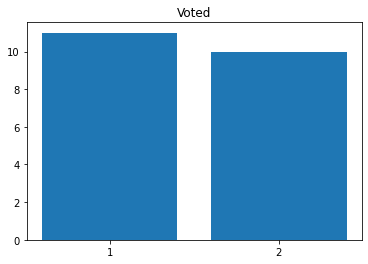

In [29]:
#target 변수의 분포 파악
train_y = train['voted']

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count= [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

<AxesSubplot:xlabel='gender_code', ylabel='count'>

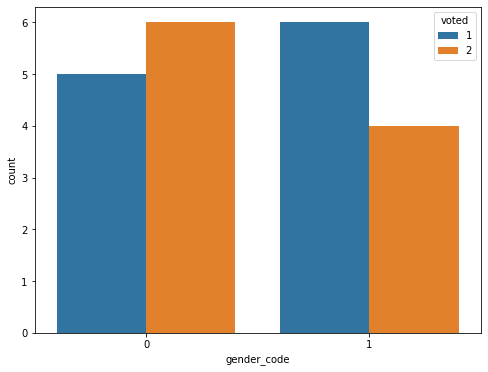

In [30]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender_code', hue = train_y)

<AxesSubplot:xlabel='age_group_code', ylabel='count'>

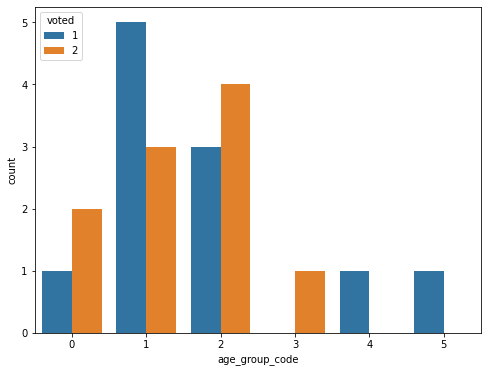

In [31]:
#굉장이 다른 성향을 보이는 age group이 존재
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group_code', hue = train_y)

<AxesSubplot:>

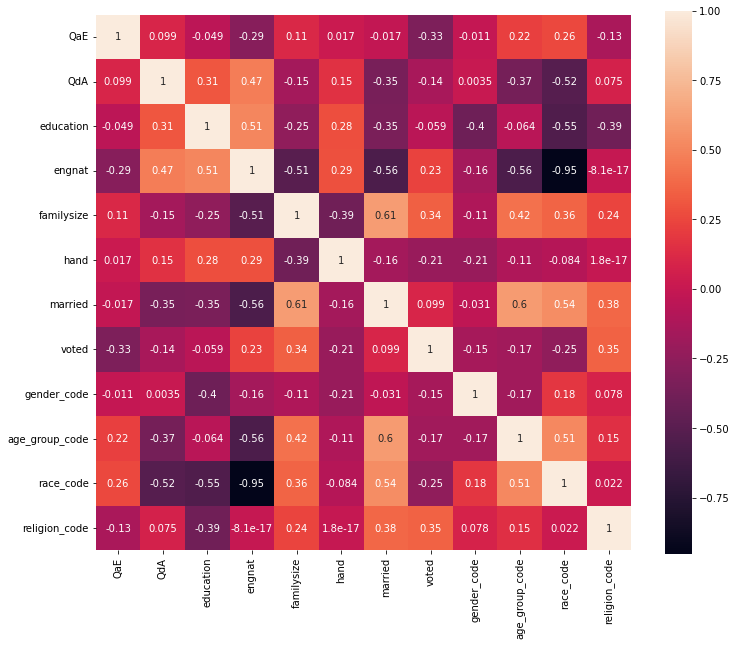

In [32]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),square = True, annot = True)

# Question을 이용한 feature 추출 예시

<AxesSubplot:xlabel='QdA', ylabel='count'>

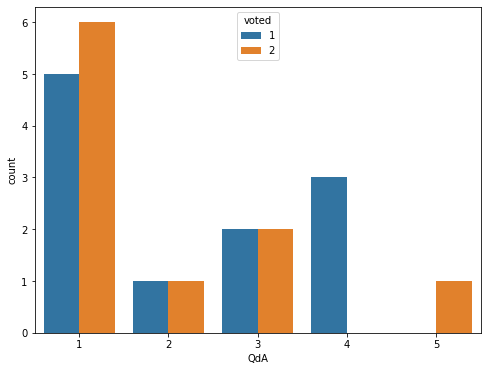

In [33]:
# 가설1: 고민 시간이 긴 질문은 영향을 많이 주는 질문일 것이다.-> Qd
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

In [34]:
# 가설2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다.
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

C:\Users\HJH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HJH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


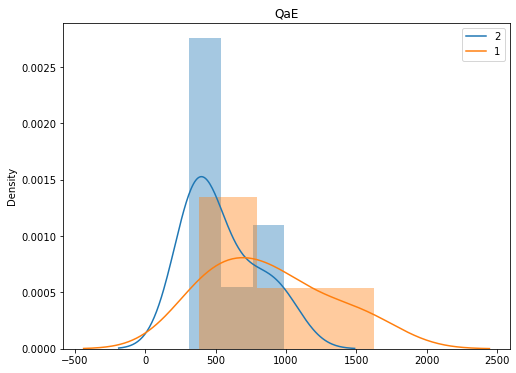

In [35]:
plot_to_voted(train, 'QaE', train_y.unique())

# Modeling

In [36]:
# 변수 제거
drop_last = ['familysize', 'gender_code','hand','education']
new_train= train.drop(drop_last, axis = 1)
new_train = new_train.drop(['voted'], axis = 1)
test = test.drop(drop_last, axis = 1)

In [37]:
new_train.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,363,1,1,3,2,2,7
1,647,5,2,1,1,0,5
2,1623,4,1,2,2,2,7
3,504,3,2,1,1,0,5
4,927,2,1,2,1,2,0


In [38]:
test.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,736,1,2,1,0,3,5
1,514,3,2,1,0,2,3
2,500,2,2,2,2,2,4
3,669,2,1,2,4,3,3
4,499,2,1,1,0,3,0


In [40]:
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(new_train, train_y)

LGBMClassifier(n_estimators=500)

In [41]:
pred_y = model.predict(test)

In [42]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# submission

In [43]:
submission['voted']=pred_y

In [44]:
submission

,voted
index,
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1


In [45]:
submission.to_csv('/sample_submission.csv')